# CelebA Attribute Recognition Dataset Preparation and EDA

The dataset is structued as follows:
``` text
CelebA:
|---img_align_celeba
|----|-------000001.jpg
|----|-------000002.jpg
|----|-------...
|---list_attr_celeba.csv
|---list_bbox_celeba.csv
|---list_eval_partition.csv
|---list_landmarks_align_celeba.csv

It will be transformed into an images folder and a labels.csv file.

In [1]:
import numpy as np, os, shutil, PIL.Image as Image, matplotlib.pyplot as plt, pandas as pd
os.chdir('..')

In [2]:
dataset_dir = os.path.join('data', 'datasets', 'attribute recognition', 'CelebA')
os.path.exists(dataset_dir)

True

In [3]:
output_images_dir = os.path.join(dataset_dir, 'Images')
os.makedirs(output_images_dir, exist_ok = True)

In [4]:
old_images_dir = os.path.join(dataset_dir, 'img_align_celeba')
os.path.exists(old_images_dir)

True

In [5]:
attributes_file = pd.read_csv(os.path.join(dataset_dir, 'list_attr_celeba.csv'))

In [ ]:
attributes_file.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
evaluation_partition_file = pd.read_csv(os.path.join(dataset_dir, 'list_eval_partition.csv'))

In [ ]:
evaluation_partition_file.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
evaluation_partition_file['partition'] = evaluation_partition_file['partition'].replace(0, 'train')
evaluation_partition_file['partition'] = evaluation_partition_file['partition'].replace(1, 'validation')
evaluation_partition_file['partition'] = evaluation_partition_file['partition'].replace(2, 'test')
evaluation_partition_file.head()

,image_id,partition
0,000001.jpg,train
1,000002.jpg,train
2,000003.jpg,train
3,000004.jpg,train
4,000005.jpg,train


In [ ]:
attributes_file['split'] = evaluation_partition_file['partition'].replace()
attributes_file.head()

/tmp/ipykernel_99174/2513961335.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  attributes_file['split'] = evaluation_partition_file['partition'].replace()


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,train
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,train
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,train
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,train
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,train


## Preprocessing

In [ ]:
for i in range(len(attributes_file)):
    image_id = attributes_file.iloc[i].image_id
    image = Image.open(os.path.join(old_images_dir, image_id))
    cropping_vertical_distance = 218-178
    new_image = Image.new(image.mode, size = (218, 218), color = (0, 0, 0)) # create a new square black image
    new_image.paste(image, box = (20, 0)) # paste the old image on the new one. This results in a squared image with black sides.
    new_image = new_image.resize((112, 112))
    new_image.save(
        os.path.join(output_images_dir, image_id)
    )
    

In [ ]:
attributes_file = attributes_file.rename(columns = {'image_id' : 'filename'})
attributes_file.head()

,filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,train
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,train
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,train
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,train
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,train


In [ ]:
attributes_file.to_csv(
    os.path.join(dataset_dir, 'labels.csv'),
    index = False,
)

In [ ]:
len(attributes_file.columns)

42

## EDA

In [ ]:
labels_file = pd.read_csv(os.path.join(dataset_dir, 'labels.csv'))

In [ ]:
labels_file.head()

,filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,train
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,train
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,train
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,train
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,train


In [ ]:
counts = {}
columns = list(labels_file.columns)[1:-1] # only keep the attributes
for column in columns:
    values = labels_file[column]
    values.replace(-1, 0, inplace = True)
    counts[column] = sum(values)

In [ ]:
sorted_index = np.argsort(list(counts.values()))
x = [key for key in counts.keys()]
y = [value for value in counts.values()]
x = [x[i] for i in sorted_index]
y = [y[i] for i in sorted_index]


In [ ]:
figures_path = os.path.join('data', 'figures', 'Attribute Recognition', 'CelebA')
os.makedirs(figures_path, exist_ok = True)

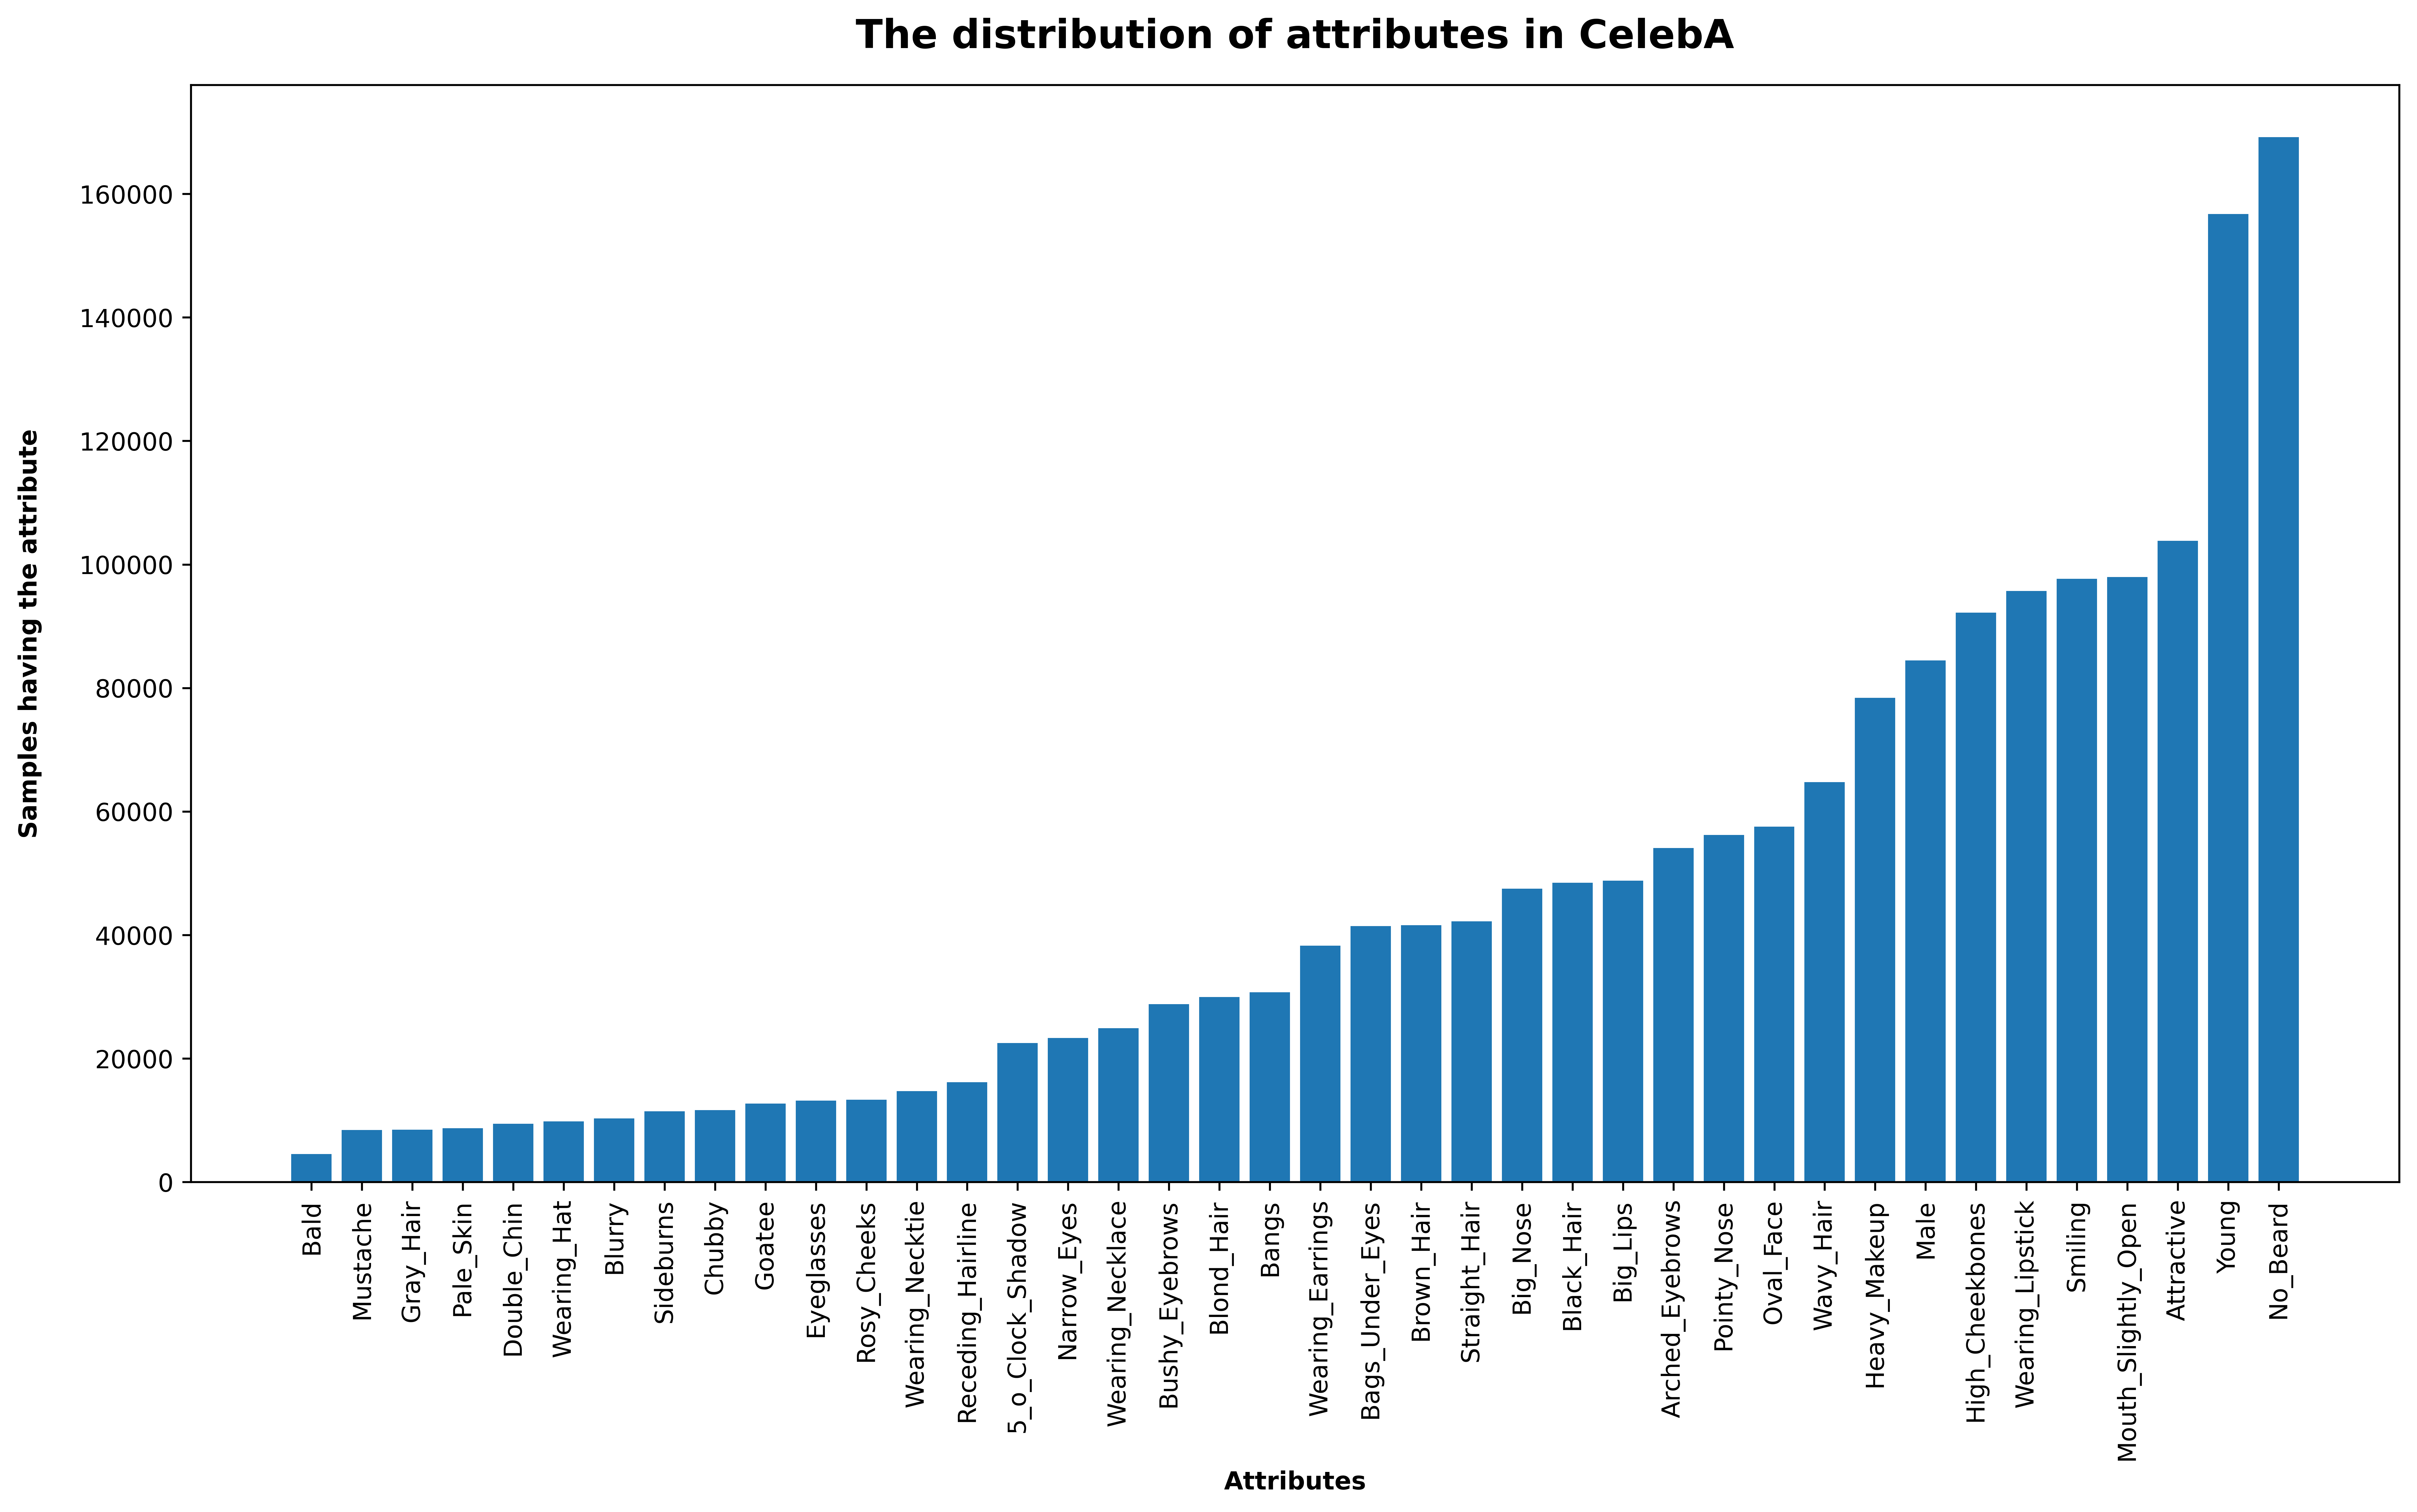

In [ ]:
plt.figure(figsize = (16, 8), dpi = 600)
plt.title('The distribution of attributes in CelebA', fontweight = 'bold', fontsize = 16, pad = 15)
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.xlabel('Attributes', fontweight = 'bold')
plt.ylabel('Samples having the attribute', labelpad = 15, fontweight = 'bold')
plt.savefig(
    os.path.join(figures_path, 'The distribution of attributes in CelebA'),
    bbox_inches = 'tight'
)
plt.show()

In [ ]:
attributes_list = np.array(list(labels_file.columns)[1:-1])

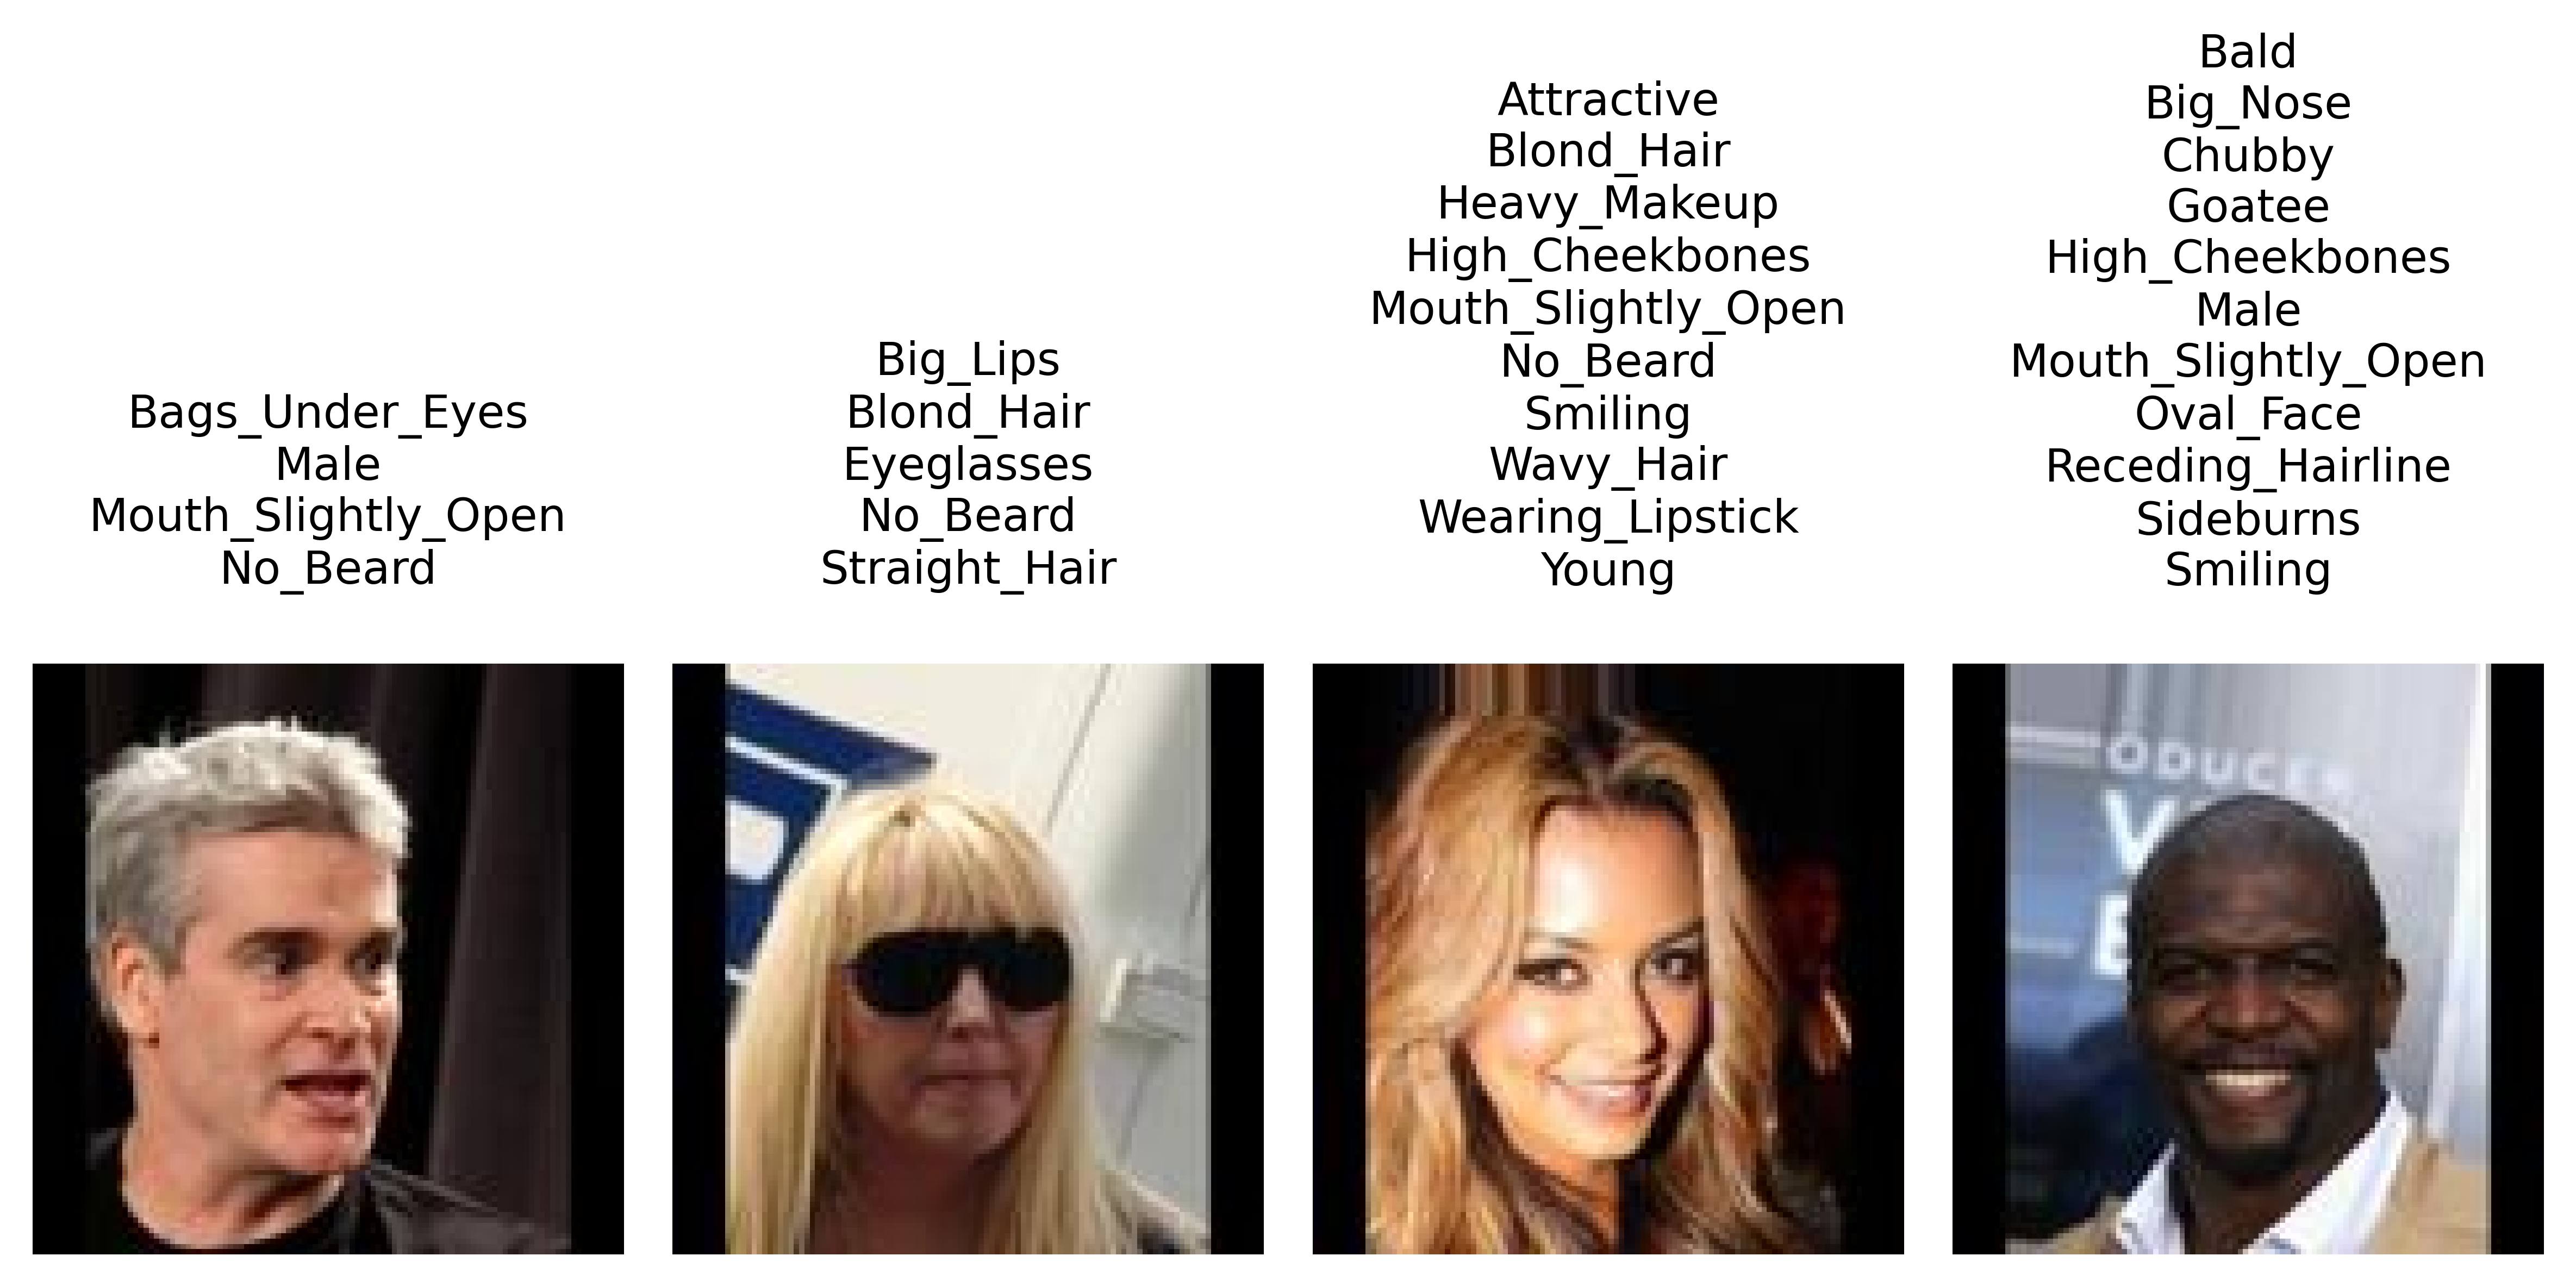

In [ ]:
plt.figure(figsize = (8, 8), dpi = 600)
for i in range(4):
    image_index = np.random.randint(low = 0, high = len(labels_file))
    image_name = labels_file['filename'].iloc[image_index]
    attributes_indices = np.array(list(labels_file.iloc[image_index])[1:-1])
    attributes = attributes_list[attributes_indices == 1]
    image = Image.open(os.path.join(output_images_dir, image_name))

    plt.subplot(1, 4, i+1)
    title_string = ''
    for attribute in attributes:
        title_string += attribute + '\n'
    plt.title(title_string, fontsize = 10)
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, 'Sample images from CelebA'),
    bbox_inches = 'tight'
)
plt.show()